In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    
    res = y - np.dot(tx,w)
    mse = (np.dot(res.T,res)/(2*len(y)))
    
    return mse
    
    # ***************************************************
    raise NotImplementedError

In [8]:
w = np.array([1,2])
compute_loss(y, tx, w)

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [10]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i, x0 in enumerate(w0):
        for j, x1  in enumerate(w1):
            losses[i][j] = compute_loss(y, tx, np.array([x0,x1]))
    # ***************************************************
    return losses
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.094 seconds


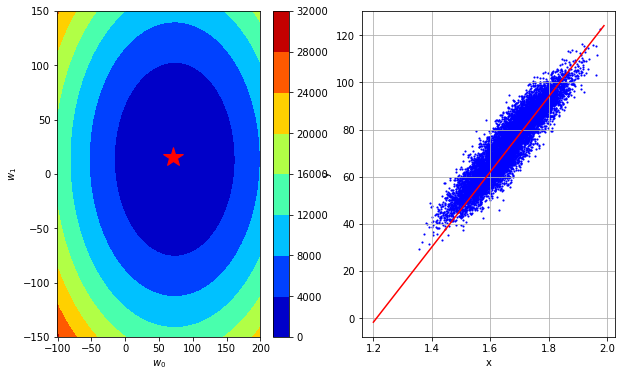

In [13]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [19]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    gradient = (-1/len(y))*np.dot(tx.T, y - np.dot(tx,w))
    # ***************************************************
    return gradient
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [20]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y, tx, w)
        
#         raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
#         raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [23]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=2792.236712759167, w0=51.305745401473644, w1=9.435798704492269
Gradient Descent(1/499): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
Gradient Descent(2/499): loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
Gradient Descent(3/499): loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/499): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/499): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/499): loss=15.387363601208632, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/499): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/499): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/499): loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/499): loss=15.3858879656522, w0=73.2937921641211

<function __main__.plot_figure>

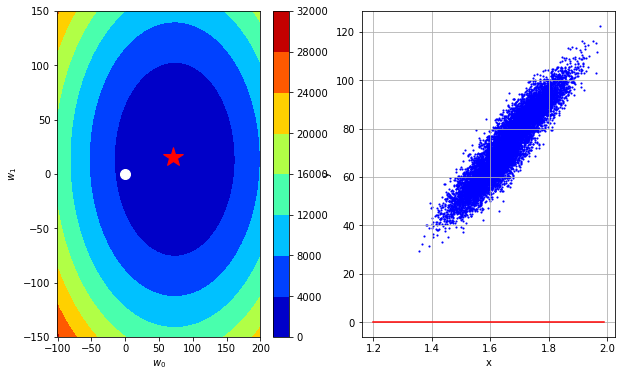

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [54]:
len(y)

10000

In [55]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)
    raise NotImplementedError


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter=-1

    for i, j in batch_iter(y,tx,1,max_iters):
        gradient = compute_gradient(i,j,w)
        loss = compute_loss(y, tx, w)
        
        w = w - gamma*gradient
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        n_iter=n_iter+1
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    
    return losses, ws
    raise NotImplementedError

In [56]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=49.54995972513963, w1=-6.368081707322704
Gradient Descent(1/49): loss=494.24122633160306, w0=54.799282109369656, w1=-11.182130951380167
Gradient Descent(2/49): loss=490.51499985671273, w0=74.18578262821875, w1=-10.438372042560236
Gradient Descent(3/49): loss=301.8209780946273, w0=66.30856958530602, w1=-8.318147437584416
Gradient Descent(4/49): loss=277.3568095744445, w0=82.13828271873982, w1=3.987903675464585
Gradient Descent(5/49): loss=99.54446287549706, w0=85.35299822682533, w1=7.9450724163082835
Gradient Descent(6/49): loss=103.41266763382613, w0=73.63344307345203, w1=7.17473827726605
Gradient Descent(7/49): loss=35.31987471255108, w0=71.5276641743977, w1=6.075749538504673
Gradient Descent(8/49): loss=44.35505451205704, w0=80.1653334670589, w1=21.132811445749915
Gradient Descent(9/49): loss=68.27899786343248, w0=82.27022651578368, w1=18.870839343226393
Gradient Descent(10/49): loss=70.20503390033211, w0=74.77423748212559, w1=21.009

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [57]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

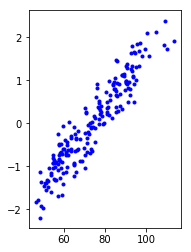

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y, tx[:,1], marker=".", color='b')

In [63]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=2829.272224438416, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/499): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/499): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/499): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/499): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/499): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/499): loss=13.644931152102245, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/499): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/499): loss=13.643446931881352, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/499): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/499): loss=13.64343490969756, w0=73.6321420223

<function __main__.plot_figure>

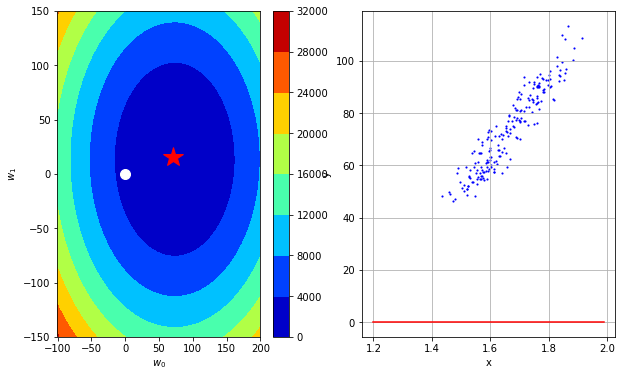

In [64]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

In [65]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

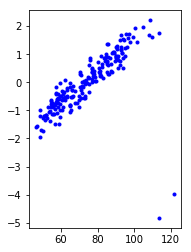

In [66]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y, tx[:,1], marker=".", color='b')

In [67]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/499): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/499): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/499): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/499): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/499): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/499): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/499): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/499): loss=65.93074217249234, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/499): loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/499): loss=65.93073020036947, w0=74.06767464603033, w

<function __main__.plot_figure>

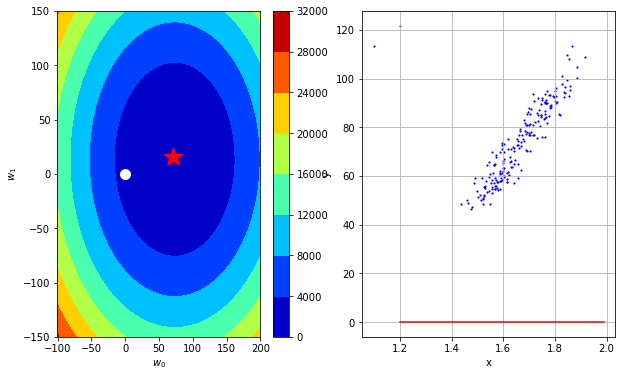

In [68]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)